In [1]:
%matplotlib inline
from loss_extractor import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def read_loss_entries(entries):
    g_a, d_a = [], []
    cycle_a, idt_a = [], []
    g_b, d_b = [], []
    cycle_b, idt_b = [], []
    for entry in entries:
        g_a.append(entry["G_A"])
        g_b.append(entry["G_B"])
        d_a.append(entry["D_A"])
        d_b.append(entry["D_B"])
        cycle_a.append(entry["cycle_A"])
        cycle_b.append(entry["cycle_B"])
        idt_a.append(entry["idt_A"])
        idt_b.append(entry["idt_B"])
    return {"G_A": g_a, "G_B": g_b, "D_A": d_a, "D_B": d_b, "cycle_A": cycle_a, "cycle_B": cycle_b, "idt_A": idt_a, "idt_B": idt_b}

In [3]:
def specify_plot(axis, x, y, title, xlabel, ylabel, color):
    color_set = ["blue", "orange", "green", "red", "purple", "brown", "pink", "gray", "olive", "cyan"]
    if color not in color_set:
        raise ValueError("Color " + color + " not supported")
    color_str = "tab:" + color
    axis.plot(x, y, color_str)
    axis.set_title(title)
    axis.set_xlabel(xlabel)
    axis.set_ylabel(ylabel)

def plot_losses(values):
    fig, axes = plt.subplots(4, 2, figsize=(30, 30))
    steps = range(1, len(values["G_A"]) + 1)
    specify_plot(axes[0,0], steps, values["G_A"], "Generator loss (A)", "Iterations", "Loss", "blue")
    specify_plot(axes[0,1], steps, values["G_B"], "Generator loss (B)", "Iterations", "Loss", "green")
    specify_plot(axes[1,0], steps, values["D_A"], "Discriminator Loss (A)", "Iterations", "Loss", "blue")
    specify_plot(axes[1,1], steps, values["D_B"], "Discriminator Loss (B)", "Iterations", "Loss", "green")
    specify_plot(axes[2,0], steps, values["cycle_A"], "Cycle Consistency Loss (A)", "Iterations", "Loss", "blue")
    specify_plot(axes[2,1], steps, values["cycle_B"], "Cycle Consistency Loss (B)", "Iterations", "Loss", "green")
    specify_plot(axes[3,0], steps, values["idt_A"], "Identity Loss (A)", "Iterations", "Loss", "blue")
    specify_plot(axes[3,1], steps, values["idt_B"], "Identity Loss (B)", "Iterations", "Loss", "green")

In [4]:
vanilla_entries = process_train_data("vanilla.out")
print("Number of steps performed: {}".format(len(vanilla_entries)))

Number of steps performed: 2000


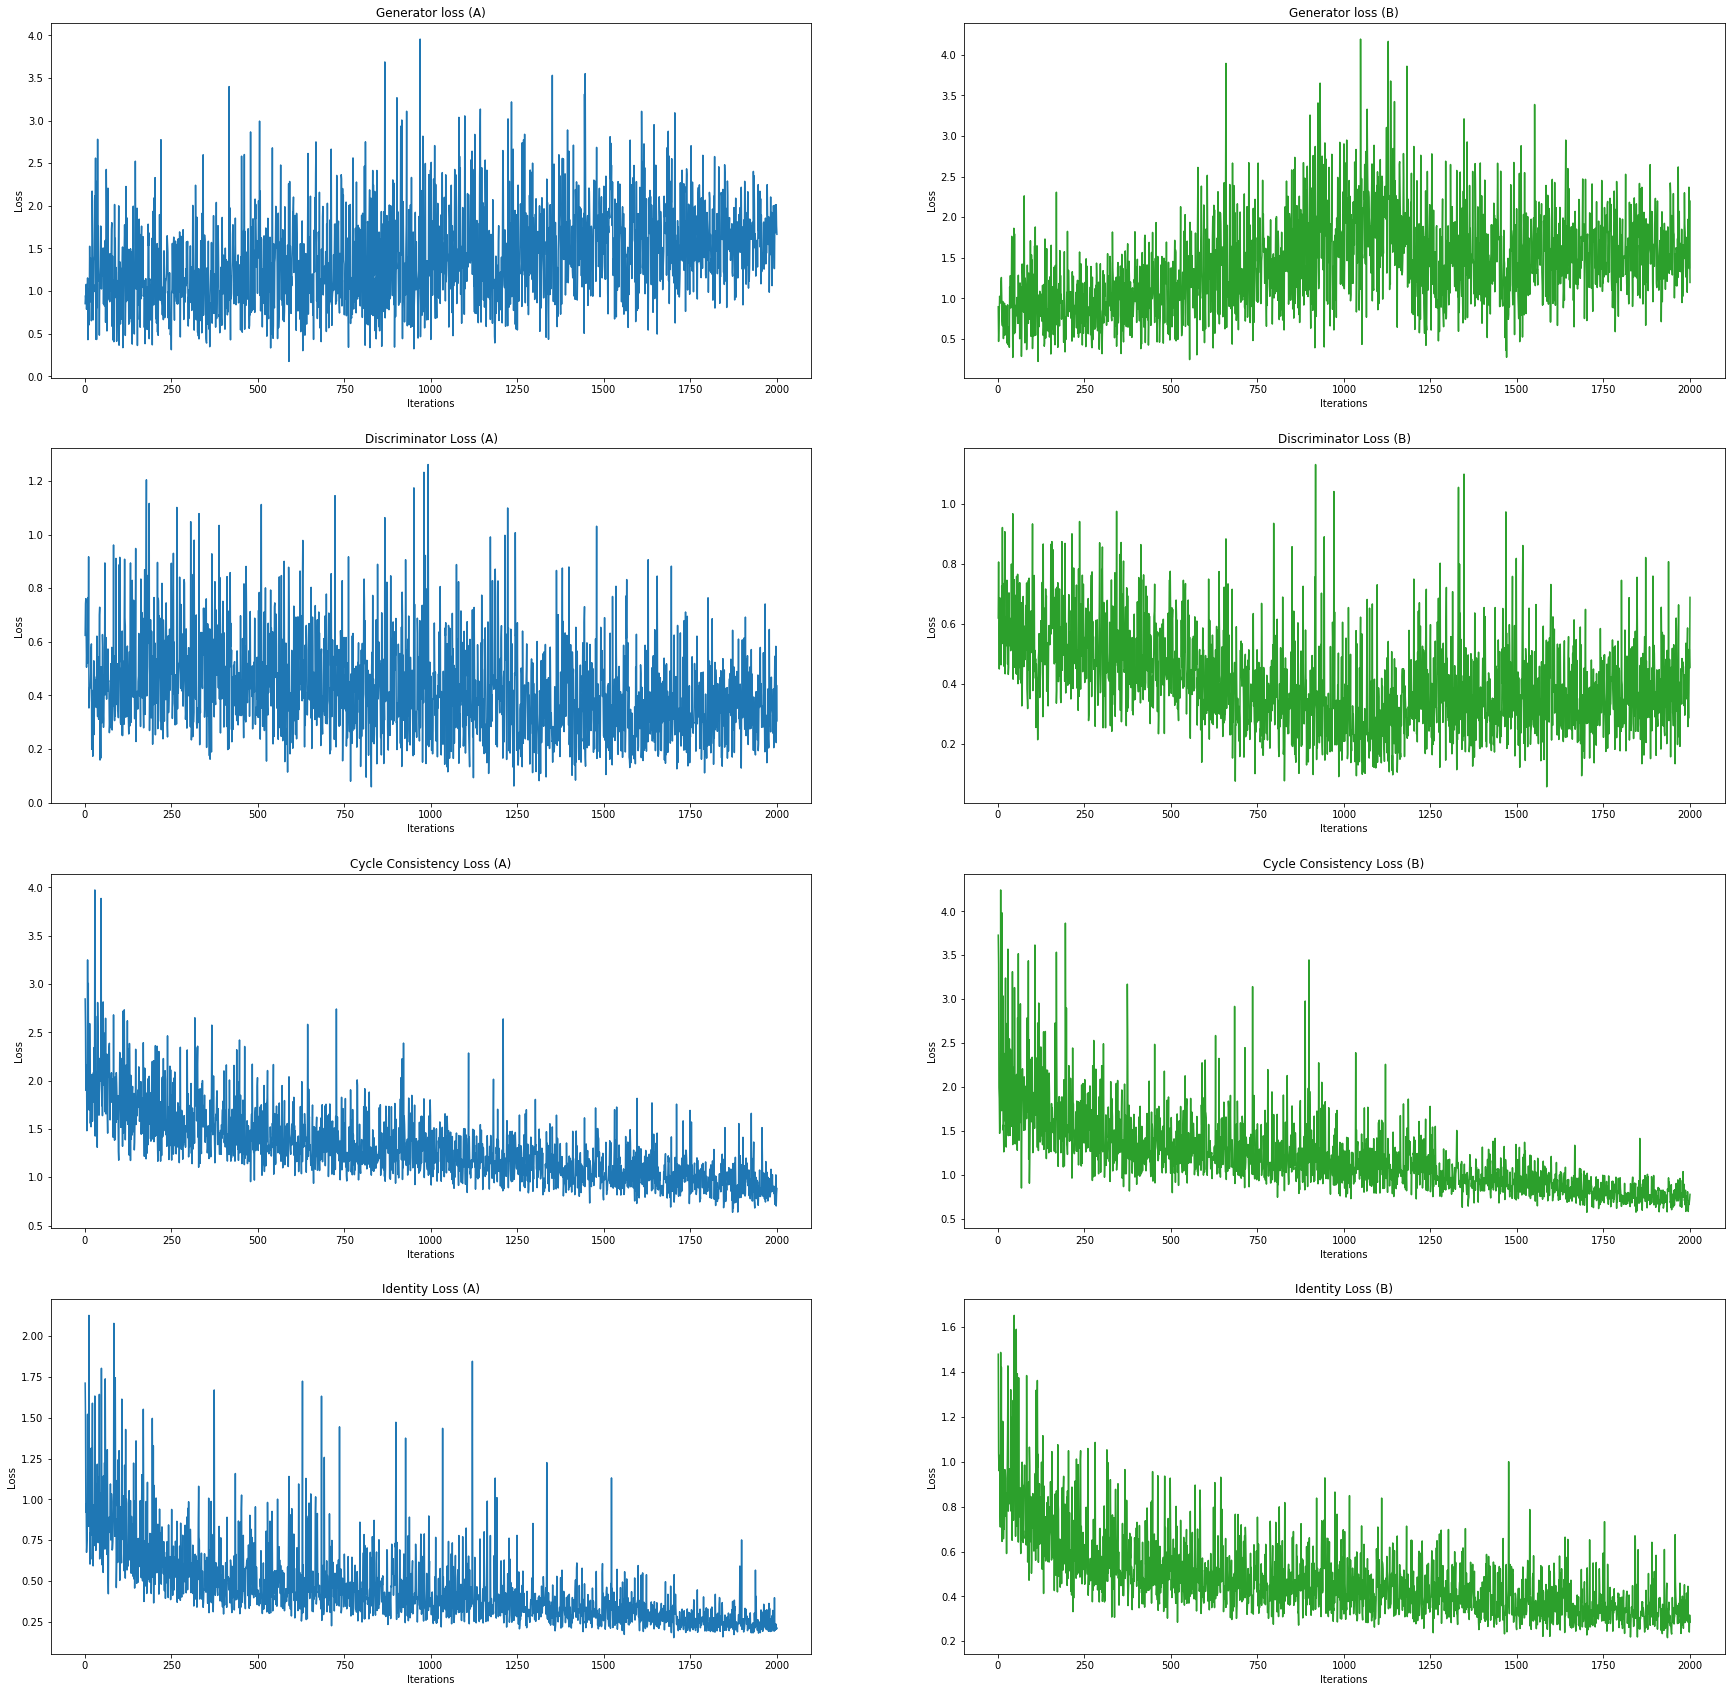

In [5]:
vanilla_values = read_loss_entries(vanilla_entries)
plot_losses(vanilla_values)

In [6]:
lsgan_entries = process_train_data("lsgan.out")
print("Number of steps performed: {}".format(len(lsgan_entries)))

Number of steps performed: 2000


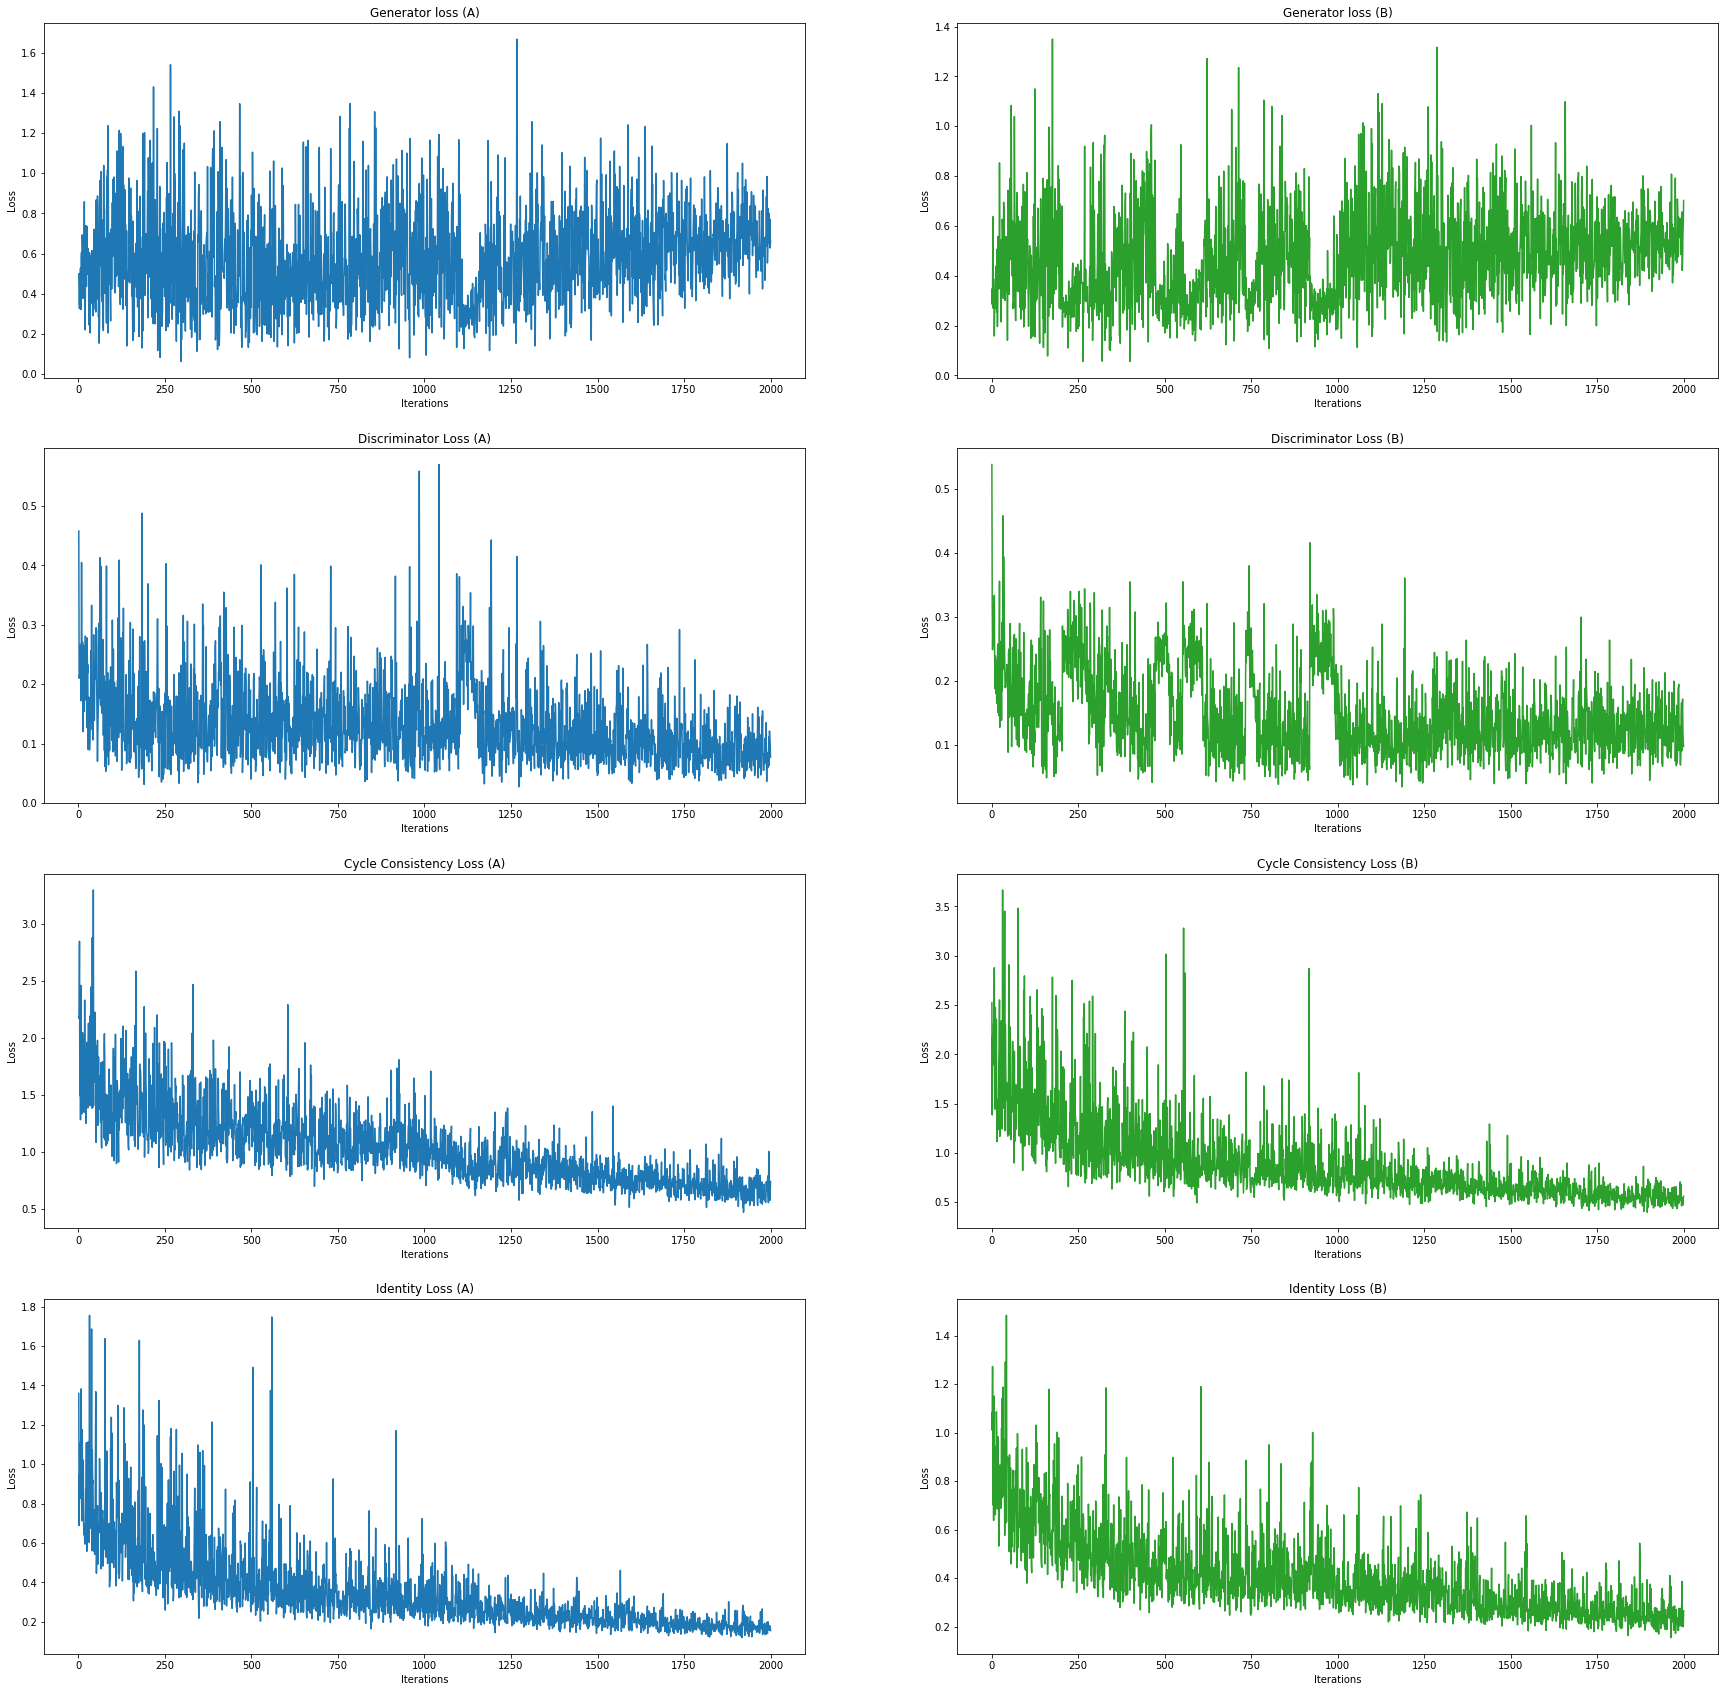

In [7]:
lsgan_values = read_loss_entries(lsgan_entries)
plot_losses(lsgan_values)

In [8]:
wgan_entries = process_train_data("wgan.out")
print("Number of steps performed: {}".format(len(wgan_entries)))

Number of steps performed: 2000


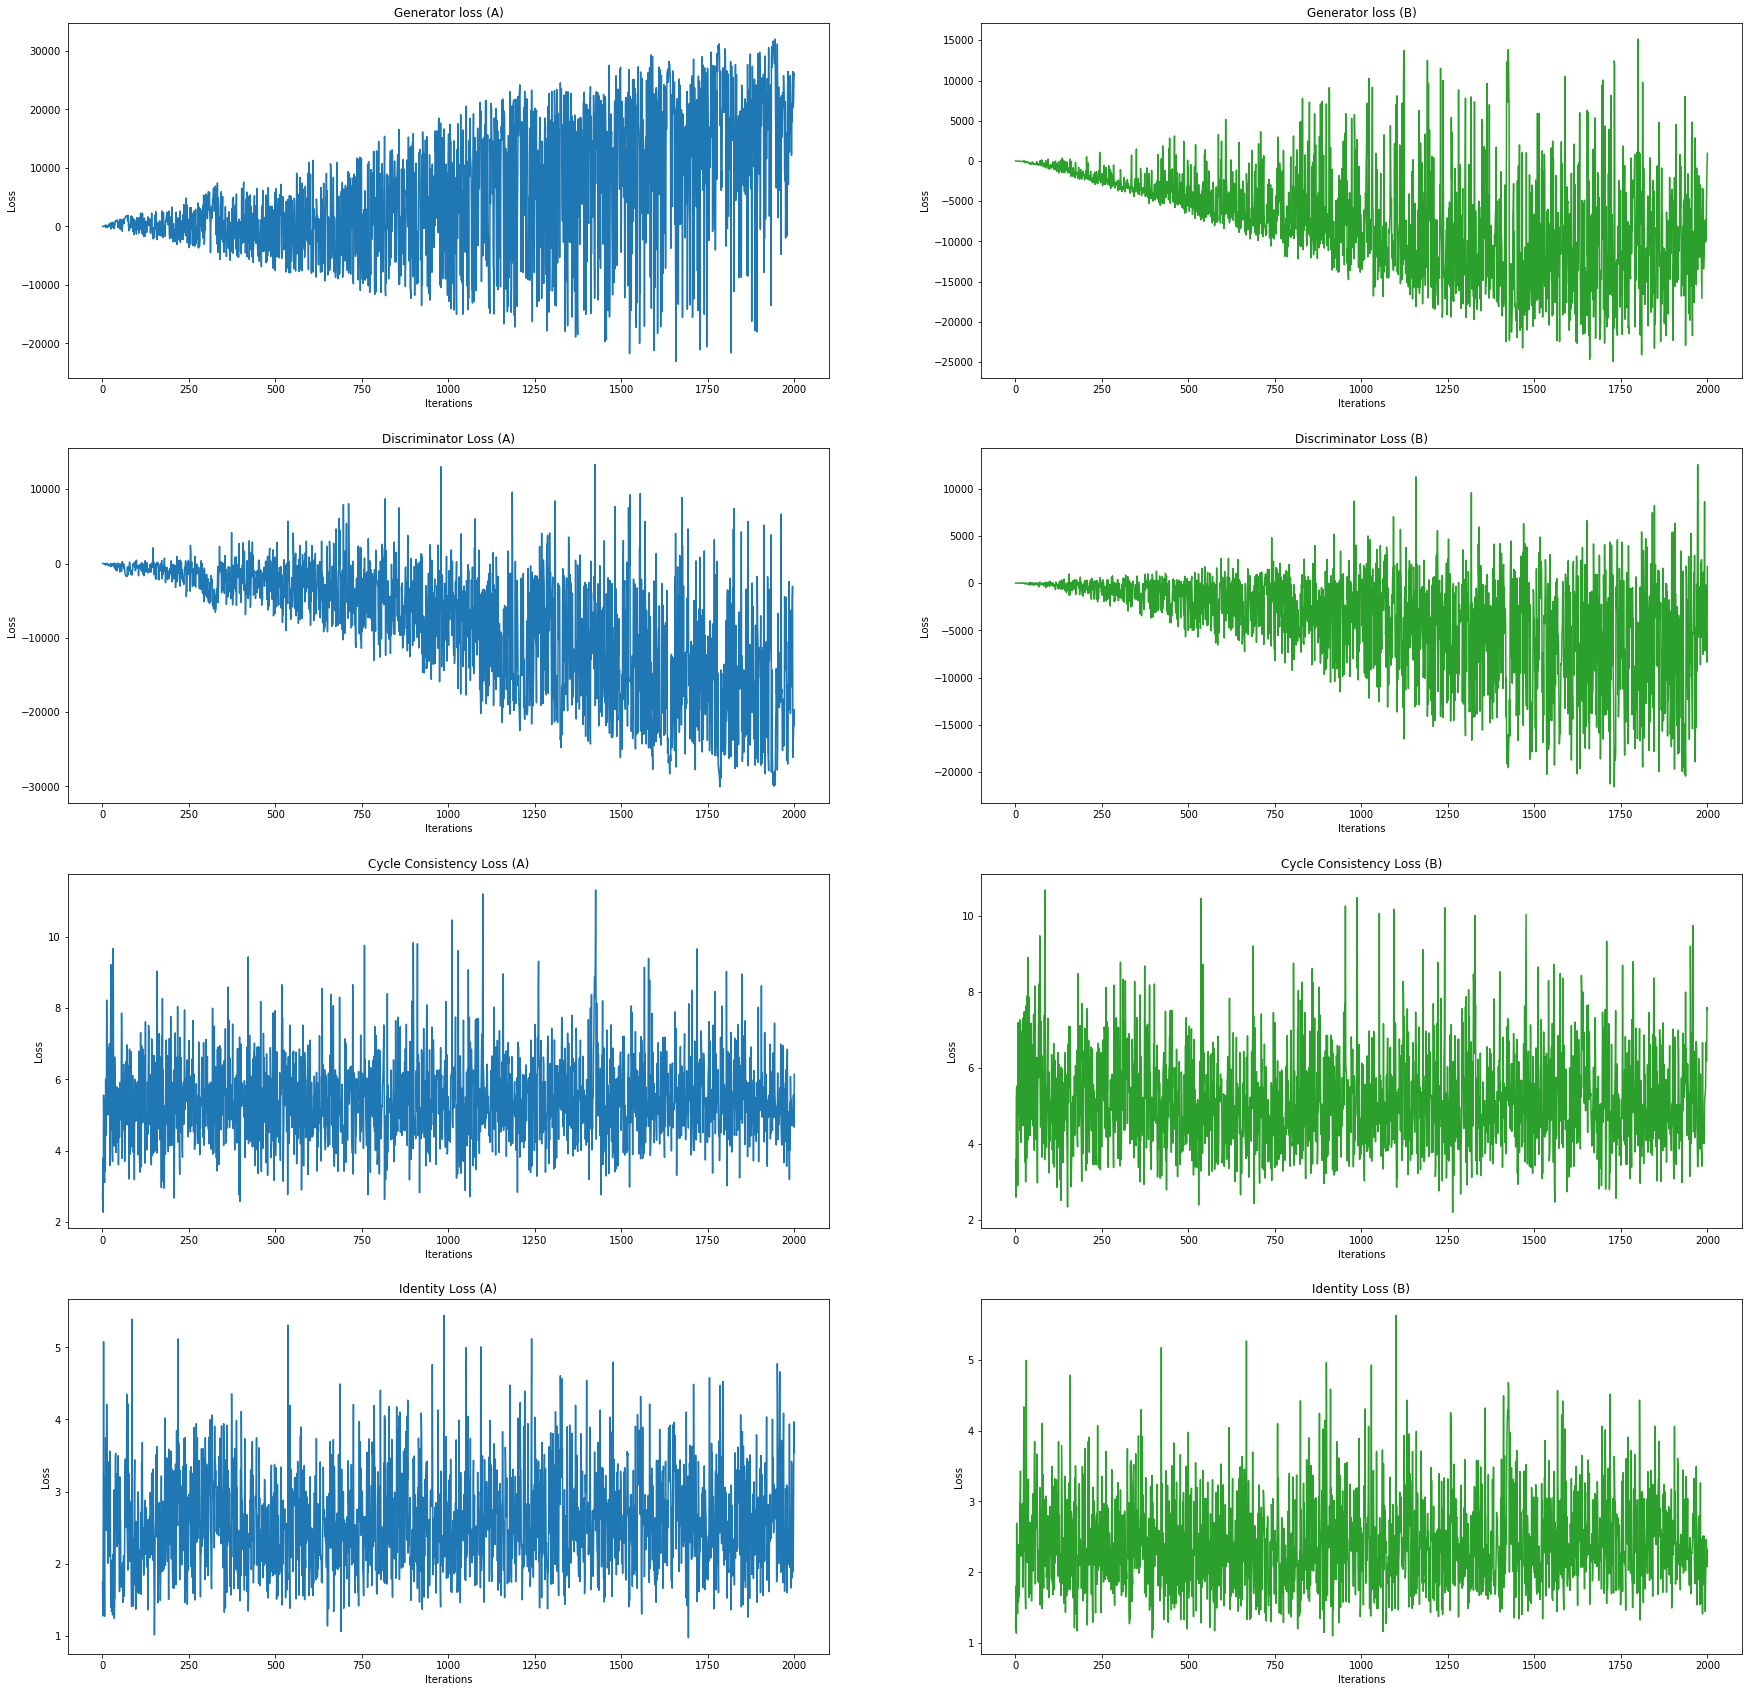

In [9]:
wgan_values = read_loss_entries(wgan_entries)
plot_losses(wgan_values)